<a href="https://colab.research.google.com/github/Sounak97/Assignment-5/blob/Sounak97/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction to Pandas


In [2]:
from __future__ import print_function
import pandas as pd
pd.__version__

'0.22.0'

In [4]:
pd.Series(['San Francisco','San Jose','Sacramento'])#creating a Series object

0    San Francisco
1         San Jose
2       Sacramento
dtype: object

DataFrame objects can be created by passing a dict mapping string column names to their respective Series. If the Series don't match in length, missing values are filled with special NA/NaN values.

In [9]:
city=pd.Series(['San Francisco','San Jose','Sacramento'])
#city=pd.Series(['San Francisco','San Jose','Sacramento','Los Angeles'])
population=pd.Series([100000,200000,300000])
#population=pd.Series([100000,200000,300000,400000])
pd.DataFrame({'City Name':city,'Population':population})

,City Name,Population
0,San Francisco,100000
1,San Jose,200000
2,Sacramento,300000


Loading an entire file into the Dataframe.E.g.:California Housing Dataset

In [10]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
california_housing_dataframe.head()#first few records

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


Studying distribution of values in the given datset using a histogram.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f84d7a41a58>]],
      dtype=object)

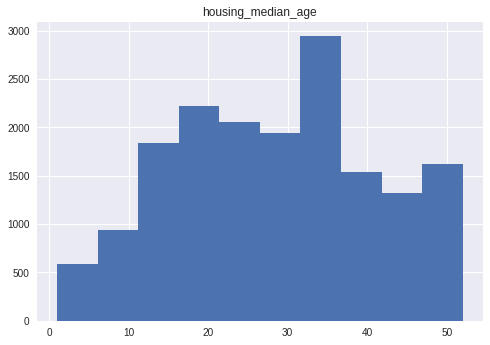

In [16]:
california_housing_dataframe.hist('housing_median_age')#any other feature column may be used in its place each will get a separate histogram
#california_housing_dataframe.hist('total_bedrooms')
#california_housing_dataframe.hist('population')

Accessing Data

In [19]:
towns=pd.DataFrame({'City Names':city,'Population':population})
print(type(towns['City Names']))
towns['City Names']

<class 'pandas.core.series.Series'>


0    San Francisco
1         San Jose
2       Sacramento
Name: City Names, dtype: object

In [22]:
print(type(towns['City Names'][1]))
towns['City Names'][1]

<class 'str'>


'San Jose'

In [23]:
print(type(towns[0:2]))
towns[0:2]

<class 'pandas.core.frame.DataFrame'>


,City Names,Population
0,San Francisco,100000
1,San Jose,200000


Manipulating Data

In [24]:
population/1000

0    100.0
1    200.0
2    300.0
dtype: float64

In [0]:
import numpy as np

In [26]:
np.log(population)

0    11.512925
1    12.206073
2    12.611538
dtype: float64

In [0]:
#The example below creates a new Series that indicates whether population is over one million:

In [31]:
population.apply(lambda val: val>1000000)#can put any value

0    False
1    False
2    False
dtype: bool

In [32]:
#adding series into existing dataframe
towns['Area square miles']=pd.Series([34.52,67.98,99.98])
towns['Population Density']=towns['Population']/towns['Area square miles']
towns

,City Names,Population,Area square miles,Population Density
0,San Francisco,100000,34.52,2896.871379
1,San Jose,200000,67.98,2942.041777
2,Sacramento,300000,99.98,3000.600120


EXERCISE 1

In [33]:
towns['Width_Saint_Name']=(towns['Area square miles']>50) & towns['City Names'].apply(lambda name: name.startswith('San'))
towns

,City Names,Population,Area square miles,Population Density,Width_Saint_Name
0,San Francisco,100000,34.52,2896.871379,False
1,San Jose,200000,67.98,2942.041777,True
2,Sacramento,300000,99.98,3000.600120,False


Indexes
Both Series and DataFrame objects also define an index property that assigns an identifier value to each Series item or DataFrame row.

By default, at construction, pandas assigns index values that reflect the ordering of the source data. Once created, the index values are stable; that is, they do not change when data is reordered.

In [34]:
city.index

RangeIndex(start=0, stop=3, step=1)

In [35]:
towns.index

RangeIndex(start=0, stop=3, step=1)

In [37]:
towns.reindex([2,0,1])

,City Names,Population,Area square miles,Population Density,Width_Saint_Name
2,Sacramento,300000,99.98,3000.600120,False
0,San Francisco,100000,34.52,2896.871379,False
1,San Jose,200000,67.98,2942.041777,True


In [38]:
#it is a good way to shuffle and randomize the data
towns.reindex(np.random.permutation(towns.index))

,City Names,Population,Area square miles,Population Density,Width_Saint_Name
1,San Jose,200000,67.98,2942.041777,True
0,San Francisco,100000,34.52,2896.871379,False
2,Sacramento,300000,99.98,3000.600120,False


EXERCISE 2

In [41]:
towns.reindex([45,56,34,100])#any value can be put

,City Names,Population,Area square miles,Population Density,Width_Saint_Name
45,NaN,NaN,NaN,NaN,NaN
56,NaN,NaN,NaN,NaN,NaN
34,NaN,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN
